In [723]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)

<module 'tools' from '/home/ivan/AFM/Instanton/tools.py'>

In [724]:
importlib.reload(tools)
eps_rho=1
eps_norm=1
rho=3.7
norm=60
size_local=5
neigh=1
#file="../runns6nt45b2.7nr45/t3.1/profile4dt3.1c528to.dat"
#file="./Tony/32x4/profile4dt0c5to.dat"
file="../Smooth/45x6/profile4dt0c5to.dat"
#file="../Smooth/45x6_georg/6288/profile4dt4c0to.dat"
#file="../Smooth/45x6_georg/profile4dt16c0to.dat"
density,sizes=tools.read_top(file)

density_2d,sizes_big,index_smal=tools.projection_2d(density,sizes)
inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_max_2d(density_2d,
                        sizes_big,rho,norm,eps_rho, eps_norm,size_local,neigh)
tools.plot_dens_2d(file,density_2d,sizes_big,t_frac)

3.745091795180004 1.4892899092201175


()

In [725]:
total

[[23, 23, 0.0030903070788795726]]

In [726]:
def inst_whole_plot(position,maxima_x,maxima_y,rho):
    #maxim=[23,23]
    return((3/(np.pi*rho**4))*(rho**2/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def inst_plot(position,maxima_x,maxima_y,rho):
    #maxim=[23,23]
    return(1/(5*2*2*np.pi*np.pi/(16*rho**3))*(rho/((position[0]-maxima_x)**2 +
                    (position[1]-maxima_y)**2+rho**2))**4)

#def inst_plot_norm(position,maxima_x,maxima_y,rho,norm):
#    return( rho*((position[0]-maxima_x)**2+ (position[1]-maxima_y)**2)
#           + norm)

def inst_plot_norm(position,maxima_x,maxima_y,rho,norm):
    #maxim=[23,23]
    return(norm/(5*2*2*np.pi*np.pi/(16*rho**3))*(rho/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def inst_plot_height(position,maxima_x,maxima_y,rho,height):
    #maxim=[23,23]
    return(height*(rho**2/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def delta_inst(rho,q0):
    return(np.sqrt(np.sqrt(6/(np.pi*np.pi*q0)))/rho)

In [727]:
x=[]
y=[]
data=[]
neigh=1
maxima=total[0]
for i in range(-neigh,neigh+1):
    for j in range(-neigh,neigh+1):
        x=(int(maxima[0])+i)%sizes_big[0]
        y=(int(maxima[1])+j)%sizes_big[1]
        data.append([x,y,density_2d[x,y]])
data=np.array(data)

In [728]:
if density_2d[maxima[0],maxima[1]]<0:
    density_2d=-density_2d
popt,q,popt2,popt3=tools.fit_inst(density_2d,maxima,neigh,sizes_big)

In [729]:
print([i,j],popt[0],popt[1],popt[2],popt[3])

[1, 1] 22.952116590072887 22.564766940081228 3.745091795180004 1.4892899092201175


In [730]:
print([i,j],popt2[0],popt2[1],popt2[2])

[1, 1] 22.96789898169174 22.714272331658652 2.8538922940225997


In [731]:
norm=(5/16*2*np.pi*np.pi/popt[2]**3)

In [732]:
data_plot=np.zeros((sizes_big[0],sizes_big[1]))
data_plot_norm=np.zeros((sizes_big[0],sizes_big[1]))
data_plot_height=np.zeros((sizes_big[0],sizes_big[1]))
for i in range(0,sizes_big[0]):
    for j in range(0,sizes_big[1]):
        data_plot[i,j]=inst_plot_norm([i,j],popt[0],popt[1],popt[2],popt[3])
        data_plot_norm[i,j]=inst_plot([i,j],popt2[0],popt2[1],popt2[2])
        data_plot_height[i,j]=inst_plot_height([i,j],maxima[0],maxima[1],
                                        popt3[0],density_2d[maxima[0],maxima[1]])

In [733]:
rho_templ=3.745091
norm_templ=0.032233
#rho, norm, norm/rho, q(0)/norm 
print(popt[2]/rho_templ,popt[3]/norm_templ,
      popt[3]/popt[2],(6/(np.pi*np.pi*(popt[2]**2)))/popt[3])

1.00000021232595 46.20388760649389 0.39766446075817385 0.029103640953061168


In [734]:
data_plot_1d=data_plot.sum(axis=1)
data_plot_1d.sum()

0.47342945700032746

In [735]:
data_plot_1d_norm=data_plot_norm.sum(axis=1)
data_plot_1d_norm.sum()

0.24224691848942762

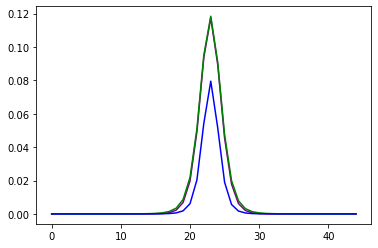

In [736]:
data_plot_1d=data_plot.sum(axis=1)
data_plot_1d_norm=data_plot_norm.sum(axis=1)
density_1d=density_2d.sum(axis=1)

plt.plot(density_1d, color="purple")
plt.plot(data_plot_1d, color="green")
plt.plot(data_plot_1d_norm, color="blue")
#plt.plot(data_plot_1d_height, color="red")

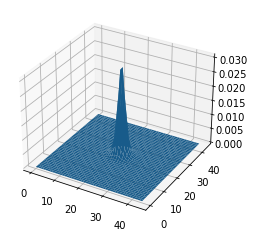

In [737]:
points=np.zeros((sizes[2],sizes[3]))

X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,density_2d)


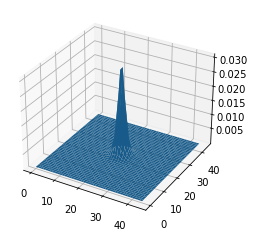

In [738]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot)

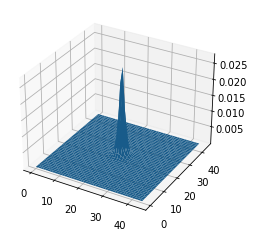

In [739]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot_norm)

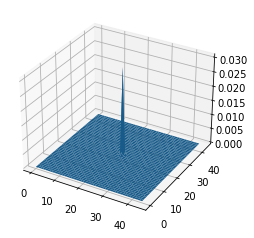

In [740]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot_height)